# Melakukan Analisis Sentimen Tentang Pembatalan Pembelian BBM Dari Pertamina Karena Kandungan Etanol Sebesar 3.5%  

# Crawl Data Twitter


In [ ]:
#@title Twitter Auth Token

twitter_auth_token = '' # auth tokenya saya hapus, karna itu bersifat rahasia

In [ ]:
# Import required Python package
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://deb.nodesource.com/node_20.x nodistro InRelease
Hit:7 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not s

In [ ]:
  # Crawl Data

  filename = 'data_mentah_bbm.csv'
  search_keyword = 'kandungan etanol since:2025-09-25 until:2025-10-04 lang:id'
  limit = 500

  !npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


Found existing file ./tweets-data/data_mentah_bbm.csv, renaming to ./tweets-data/data_mentah_bbm.old.csv

-- Scrolling... (1) (2) (3) (4) (5)
Filling in keywords: kandungan etanol since:2025-09-25 until:2025-10-04 lang:id

 (6)

Your tweets saved to: /content/tweets-data/data_mentah_bbm.csv
Total tweets saved: 20

-- Scrolling... (1)

Your tweets saved to: /content/tweets-data/data_mentah_bbm.csv
Total tweets saved: 40

-- Scrolling... (1) (2)

Your tweets saved to: /content/tweets-data/data_mentah_bbm.csv
Total tweets saved: 60

-- Scrolling... (1)

Your tweets saved to: /content/tweets-data/da

In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
file_path = f"tweets-data/data_mentah_bbm.csv"

# baca file csv
df = pd.read_csv(file_path, delimiter=",")

# tampilkan data
display(df)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1974089927441985802,Fri Oct 03 23:57:21 +0000 2025,0,@sharpandshark Masalahnya bukan di takaran kan...,1974262528923594779,NaN,sharpandshark,in,NaN,0,0,0,https://x.com/undefined/status/197426252892359...,1797257016676933632,NaN
1,1974080788271673543,Fri Oct 03 23:51:25 +0000 2025,1,@hasyimmah Bukanya semua yang udah di pasar ad...,1974261034509906362,NaN,hasyimmah,in,NaN,0,1,0,https://x.com/undefined/status/197426103450990...,1076802402638913536,NaN
2,1974253906487296473,Fri Oct 03 23:23:05 +0000 2025,0,Kandungan Etanol (Bioetanol) dalam BBM Pertami...,1974253906487296473,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197425390648729...,1963890994337947648,NaN
3,1973912976349671528,Fri Oct 03 23:03:49 +0000 2025,0,@apansa_kalengs Setelah kasus Pertamax oplosan...,1974249054579417538,NaN,apansa_kalengs,in,NaN,0,0,0,https://x.com/undefined/status/197424905457941...,533938183,NaN
4,1974245163783393596,Fri Oct 03 22:48:21 +0000 2025,0,Kandungan Etanol di BBM Pertamina Ternyata Ini...,1974245163783393596,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197424516378339...,47274731,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1973334300587335873,Wed Oct 01 10:47:55 +0000 2025,0,@parto_hap @BigAlphaID Kandungan etanol 3 5% d...,1973339083507376151,NaN,parto_hap,in,NaN,0,1,0,https://x.com/undefined/status/197333908350737...,1720665183188922368,NaN
206,1973334300587335873,Wed Oct 01 10:37:30 +0000 2025,0,@cakbottom @BigAlphaID Kandungan etanol yang i...,1973336463325745624,NaN,cakbottom,in,NaN,0,1,0,https://x.com/undefined/status/197333646332574...,1720665183188922368,NaN
207,1973334300587335873,Wed Oct 01 10:36:48 +0000 2025,0,@BigAlphaID @grok berapa kandungan etanol yg b...,1973336285990514760,NaN,BigAlphaID,in,NaN,0,1,0,https://x.com/undefined/status/197333628599051...,1204243316000219140,NaN
208,1973334300587335873,Wed Oct 01 10:28:54 +0000 2025,4045,VIVO dan BP mendadak batal beli BBM dari Perta...,1973334300587335873,NaN,NaN,in,NaN,458,194,1878,https://x.com/undefined/status/197333430058733...,958566590768926721,NaN


In [5]:
# Cek jumlah data yang didapatkan

num_tweets = len(df)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

Jumlah tweet dalam dataframe adalah 210.


clening data


In [6]:
df = df[['full_text']]
df

,full_text
0,@sharpandshark Masalahnya bukan di takaran kan...
1,@hasyimmah Bukanya semua yang udah di pasar ad...
2,Kandungan Etanol (Bioetanol) dalam BBM Pertami...
3,@apansa_kalengs Setelah kasus Pertamax oplosan...
4,Kandungan Etanol di BBM Pertamina Ternyata Ini...
...,...
205,@parto_hap @BigAlphaID Kandungan etanol 3 5% d...
206,@cakbottom @BigAlphaID Kandungan etanol yang i...
207,@BigAlphaID @grok berapa kandungan etanol yg b...
208,VIVO dan BP mendadak batal beli BBM dari Perta...


In [7]:
df.shape

(210, 1)

In [8]:
df = df.drop_duplicates(subset=['full_text'])
print("Data Duplikat = ", df.duplicated().sum())

Data Duplikat =  0


In [ ]:
df = df.dropna()

In [9]:
df.isnull().sum()

,0
full_text,0


In [10]:
def clean_twitter_text(text):
    # Hapus mention
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # Hapus URL
    text = re.sub(r'https?://\S+', '', text)
    # Hapus RT
    text = re.sub(r'RT[\s]+', '', text)
    # Hapus hashtag
    text = re.sub(r'#\w+', '', text)
    # Hapus karakter selain huruf/angka/spasi/+/./, /%
    text = re.sub(r'[^A-Za-z0-9 +.,%]', '', text)
    # Normalisasi spasi (ganti banyak spasi jadi satu spasi)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Aplikasi ke DataFrame (asumsi df sudah didefinisikan)
df['full_text'] = df['full_text'].apply(clean_twitter_text)

/tmp/ipython-input-3277134304.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = df['full_text'].apply(clean_twitter_text)


In [11]:
# Daftar kata kunci yang mirip berita
news_keywords = r'(Artikel|Media|Presenter|Breaking News|Tribun|Detik|CNN|Liputan6|Kompas|Reporter|Jurnalis|Redaksi)'

# Buang tweet yang mengandung kata kunci berita
df = df[~df['full_text'].str.contains(news_keywords, case=False, na=False)]

/tmp/ipython-input-4444843.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[~df['full_text'].str.contains(news_keywords, case=False, na=False)]


In [12]:
df['full_text'] = df['full_text'].str.lower()

In [13]:
df.shape

(202, 1)

In [14]:
df

,full_text
0,masalahnya bukan di takaran kandungan etanol b...
1,bukanya semua yang udah di pasar ada kandungan...
2,kandungan etanol bioetanol dalam bbm pertamina
3,setelah kasus pertamax oplosan konsumen termas...
4,kandungan etanol di bbm pertamina ternyata ini...
...,...
205,kandungan etanol 3 5% dalam bbm bisa meningkat...
206,kandungan etanol yang ideal dalam bensin terga...
207,berapa kandungan etanol yg bagus
208,vivo dan bp mendadak batal beli bbm dari perta...


In [15]:
from collections import Counter

all_words = " ".join(df['full_text']).split()
Counter(all_words).most_common(50)

[('etanol', 243),
 ('kandungan', 209),
 ('bbm', 131),
 ('dan', 105),
 ('pertamina', 95),
 ('di', 84),
 ('vivo', 65),
 ('base', 57),
 ('karena', 56),
 ('3', 55),
 ('fuel', 51),
 ('swasta', 49),
 ('batal', 48),
 ('spbu', 48),
 ('dari', 48),
 ('beli', 45),
 ('dalam', 43),
 ('sesuai', 42),
 ('5%', 40),
 ('ada', 39),
 ('yang', 38),
 ('pada', 37),
 ('ini', 34),
 ('tidak', 32),
 ('bisa', 32),
 ('bp', 32),
 ('mesin', 32),
 ('energi', 30),
 ('standar', 29),
 ('untuk', 28),
 ('ke', 26),
 ('tetap', 26),
 ('nasional', 25),
 ('kendaraan', 25),
 ('lebih', 24),
 ('apa', 23),
 ('shell', 23),
 ('tinggi', 21),
 ('yg', 20),
 ('tapi', 20),
 ('kualitas', 20),
 ('seperti', 20),
 ('masih', 20),
 ('indonesia', 20),
 ('juga', 19),
 ('regulasi', 19),
 ('bahan', 19),
 ('itu', 18),
 ('dengan', 18),
 ('mutu', 17)]

In [16]:
#Normalisasi

norm = {    'yg': 'yang', 'ya': 'iya', 'iy': 'iya','utk': 'untuk', 'dgn': 'dengan', 'krn': 'karena', 'ga': 'tidak',
    'gak': 'tidak', 'nggak': 'tidak', 'tdk': 'tidak', 'gaada': 'tidak ada',
    'gamau': 'tidak mau', 'ogah': 'tidak mau', 'aja': 'saja', 'sm': 'sama',
    'klo': 'kalau', 'kalo': 'kalau', 'dr': 'dari', 'dn': 'dan', 'amp': 'sampai',
    'bgt': 'sangat', 'banget': 'sangat', 'bener': 'benar', 'beneran': 'sungguh',
    'udh': 'sudah', 'sdh': 'sudah', 'udah': 'sudah', 'blom': 'belum',
    'dpt': 'dapat', 'jd': 'jadi', 'tp': 'tapi', 'tpi': 'tapi', 'trs': 'terus',
    'jg': 'juga', 'kyk': 'seperti', 'kayak': 'seperti', 'sprt': 'seperti',
    'gini': 'begini', 'gt': 'begitu', 'knp': 'kenapa', 'lu': 'kamu', 'gw': 'saya',
    'sy': 'saya', 'brp': 'berapa', 'gmn': 'bagaimana', 'bkn': 'bukan', 'tau': 'tahu',
    'skrg': 'sekarang', 'dlm': 'dalam', 'bikin': 'membuat', 'sampe': 'sampai',
    'pake': 'pakai', 'emg': 'memang', 'sih': '', 'mah': '', 'dong': '', 'kok': 'kenapa',
    'lah': '', 'lha': '', 'nih': 'ini', 'sbg': 'sebagai', 'pd': 'pada', 'bnyk': 'banyak',
    'bener2': 'benar-benar', 'mreka': 'mereka', 'ngecek': 'mengecek', 'caur': 'hancur',
    'menginfoken': 'menginformasikan', 'salfok': 'salah fokus', 'gegara': 'gara-gara',
    'astaghah': 'astaga', 'lbh': 'lebih', 'kmrin': 'kemarin', 'shrusnya': 'seharusnya',
    'pantesan': 'pantasan', 'tetiba': 'tiba-tiba', 'wadirut': 'wakil direktur utama'}


def Normalisasi(str_text):
    str_text = str_text.lower()  # Tambah lowercase
    for i in norm:
        pattern = r'\b' + re.escape(i) + r'\b'  # Whole word
        str_text = re.sub(pattern, norm[i], str_text, flags=re.IGNORECASE)
    return str_text

df['full_text'] = df['full_text'].apply(Normalisasi)
df

,full_text
0,masalahnya bukan di takaran kandungan etanol b...
1,bukanya semua yang sudah di pasar ada kandunga...
2,kandungan etanol bioetanol dalam bbm pertamina
3,setelah kasus pertamax oplosan konsumen termas...
4,kandungan etanol di bbm pertamina ternyata ini...
...,...
205,kandungan etanol 3 5% dalam bbm bisa meningkat...
206,kandungan etanol yang ideal dalam bensin terga...
207,berapa kandungan etanol yang bagus
208,vivo dan bp mendadak batal beli bbm dari perta...


In [17]:
# Simpan ke file CSV (tanpa index kolom)
df.to_csv('tweet_bersih.csv', index=False, encoding='utf-8')

In [18]:
df_baca = pd.read_csv('tweet_bersih.csv')
print(df_baca.head())

                                           full_text
0  masalahnya bukan di takaran kandungan etanol b...
1  bukanya semua yang sudah di pasar ada kandunga...
2     kandungan etanol bioetanol dalam bbm pertamina
3  setelah kasus pertamax oplosan konsumen termas...
4  kandungan etanol di bbm pertamina ternyata ini...


In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

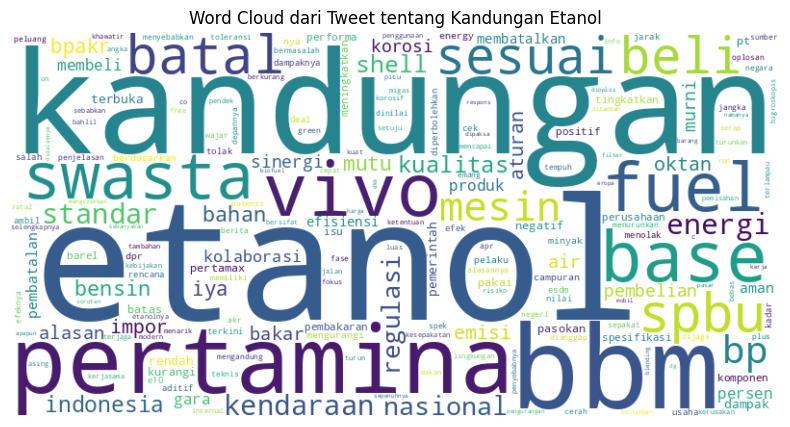

In [20]:
#Menampilkan Word Cloud
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

all_text = ' '.join(df['full_text'].astype(str))
stop_words = set(stopwords.words('indonesian'))

# Generate word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stop_words,
    max_words=200,
    colormap='viridis',
    collocations=False
).generate(all_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hilangkan sumbu
plt.title('Word Cloud dari Tweet tentang Kandungan Etanol')
plt.show()

wordcloud.to_file('wordcloud_etanol.png')

In [21]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 1.9 MB/s eta 0:00:00


In [23]:
# Menggunakan Mode AI ibm-granite/granite-3.3-8b-instruct untuk melakukaan klasifikasi analisis sentimen
# Import library yang diperlukan
import os
import pandas as pd
import replicate
from langchain_community.llms import Replicate
from google.colab import userdata # Khusus untuk Google Colab
import time

# --- 1. Setup Model dan API Token ---
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token

# --- 2. Muat dan Siapkan Data dari CSV ---
try:
    df = pd.read_csv('tweet_bersih.csv')
    total_tweets = len(df)
    print(f"✓ File CSV berhasil dimuat!")
    print(f"✓ Total tweet yang akan dianalisis: {total_tweets}")
    print("-" * 70)
except FileNotFoundError:
    print("❌ Error: File 'tweet_bersih.csv' tidak ditemukan.")
    exit()

# --- 3. SOLUSI: Batch Processing untuk mengatasi limit token ---
def process_tweets_in_batches(df, batch_size=40):
    """
    Memproses tweet dalam batch untuk menghindari token limit
    """
    results = []
    insights = []
    total_batches = (len(df) + batch_size - 1) // batch_size

    print(f"📊 Memproses {len(df)} tweet dalam {total_batches} batch (@ {batch_size} tweet/batch)")
    print("=" * 70)

    for batch_num in range(total_batches):
        start_idx = batch_num * batch_size
        end_idx = min((batch_num + 1) * batch_size, len(df))
        batch_df = df.iloc[start_idx:end_idx]

        print(f"\n🔄 Processing Batch {batch_num + 1}/{total_batches} (Tweet {start_idx + 1}-{end_idx})")

        # Siapkan teks batch
        batch_tweets = "\n".join([
            f"Tweet {start_idx + i + 1}: {text}"
            for i, text in enumerate(batch_df['full_text'])
        ])

        # Buat prompt untuk batch ini
        prompt = f"""
Anda adalah ahli analisis sentimen media sosial. Klasifikasikan sentimen tweet tentang polemik etanol BBM Pertamina.

INSTRUKSI KLASIFIKASI:
- Positif: Dukungan, kepuasan, optimis terhadap kebijakan/produk
- Negatif: Kritik, keluhan, kekhawatiran, kemarahan
- Netral: Informatif, faktual, tanpa emosi kuat

FORMAT OUTPUT WAJIB:
Tweet [nomor] -> [Sentimen]

PENTING: Klasifikasikan SEMUA tweet berikut tanpa melewatkan satupun:

{batch_tweets}

Berikan klasifikasi untuk SETIAP tweet di atas:"""

        # Panggil model dengan parameter optimal
        try:
            # Gunakan replicate.run dengan parameter lengkap
            output = replicate.run(
                "ibm-granite/granite-3.3-8b-instruct",
                input={
                    "prompt": prompt,
                    "max_tokens": 4800,
                    "min_tokens": 50,
                    "temperature": 0.2,
                    "top_p": 0.85,
                    "top_k": 40,
                    "presence_penalty": 0.1,
                    "frequency_penalty": 0.1,
                    "stream": False,
                    "add_generation_prompt": True
                }
            )

            # Gabungkan output
            if isinstance(output, list):
                batch_result = "".join(output)
            else:
                batch_result = str(output)

            results.append(batch_result)
            print("✓ Batch berhasil diproses")
            print("-" * 40)
            print(batch_result[:500] + "..." if len(batch_result) > 500 else batch_result)

            # Delay untuk menghindari rate limiting
            if batch_num < total_batches - 1:
                time.sleep(2)

        except Exception as e:
            print(f"❌ Error pada batch {batch_num + 1}: {e}")
            results.append(f"Error pada batch {batch_num + 1}")

    return results

# --- 4. PROSES SEMUA TWEET ---
print("\n🚀 MEMULAI ANALISIS SENTIMEN UNTUK 202 TWEET")
print("=" * 70)

batch_results = process_tweets_in_batches(df, batch_size=40)

# --- 5. GABUNGKAN HASIL DAN TAMPILKAN ---
print("\n" + "=" * 70)
print("📊 HASIL KLASIFIKASI LENGKAP (202 TWEET)")
print("=" * 70 + "\n")

all_classifications = "\n".join(batch_results)
print(all_classifications)

# --- 6. HITUNG STATISTIK ---
print("\n" + "=" * 70)
print("📈 STATISTIK SENTIMEN")
print("=" * 70)

# Parse hasil untuk statistik
lines = all_classifications.split('\n')
sentiment_counts = {'Positif': 0, 'Negatif': 0, 'Netral': 0}

for line in lines:
    if '->' in line and 'Tweet' in line:
        if 'Positif' in line:
            sentiment_counts['Positif'] += 1
        elif 'Negatif' in line:
            sentiment_counts['Negatif'] += 1
        elif 'Netral' in line:
            sentiment_counts['Netral'] += 1

total_classified = sum(sentiment_counts.values())
print(f"\nTotal Tweet Terklasifikasi: {total_classified}/{len(df)}")
print(f"• Positif: {sentiment_counts['Positif']} ({sentiment_counts['Positif']/total_classified*100:.1f}%)")
print(f"• Negatif: {sentiment_counts['Negatif']} ({sentiment_counts['Negatif']/total_classified*100:.1f}%)")
print(f"• Netral: {sentiment_counts['Netral']} ({sentiment_counts['Netral']/total_classified*100:.1f}%)")

# --- 7. ANALISIS INSIGHT KESELURUHAN ---
print("\n" + "=" * 70)
print("🔍 GENERATING INSIGHT & FINDINGS...")
print("=" * 70)

# Sample tweets untuk context
sample_positif = df.iloc[:5]['full_text'].tolist() if len(df) > 5 else df['full_text'].tolist()
sample_negatif = df.iloc[10:15]['full_text'].tolist() if len(df) > 15 else []

insight_prompt = f"""
Berdasarkan analisis sentimen {total_classified} tweet tentang polemik etanol BBM Pertamina:

DISTRIBUSI SENTIMEN:
- Positif: {sentiment_counts['Positif']} tweet ({sentiment_counts['Positif']/total_classified*100:.1f}%)
- Negatif: {sentiment_counts['Negatif']} tweet ({sentiment_counts['Negatif']/total_classified*100:.1f}%)
- Netral: {sentiment_counts['Netral']} tweet ({sentiment_counts['Netral']/total_classified*100:.1f}%)

Berikan analisis mendalam dengan format:

**INSIGHT & FINDINGS**

1. **Persepsi Umum**:
   Jelaskan gambaran umum sentimen publik berdasarkan distribusi di atas.

2. **Topik Dominan**:
   - Tweet Negatif: Isu apa yang paling dikeluhkan?
   - Tweet Positif: Apa yang didukung publik?
   - Tweet Netral: Informasi apa yang disebarkan?

3. **Pihak yang Disorot**:
   Identifikasi stakeholder yang paling banyak disebut (Pertamina, Pemerintah, Vivo, BP, Shell).

4. **Rekomendasi Strategis**:
   Berikan 3 rekomendasi untuk Pertamina berdasarkan sentimen publik.

5. **Kesimpulan Utama**:
   Rangkum temuan kunci dalam 2-3 kalimat.
"""

try:
    insight_output = replicate.run(
        "ibm-granite/granite-3.3-8b-instruct",
        input={
            "prompt": insight_prompt,
            "max_tokens": 1500,
            "temperature": 0.4,
            "top_p": 0.9,
            "stream": False
        }
    )

    if isinstance(insight_output, list):
        insights = "".join(insight_output)
    else:
        insights = str(insight_output)

    print("\n" + insights)

except Exception as e:
    print(f"❌ Error generating insights: {e}")

# --- 8. SIMPAN HASIL ---
print("\n" + "=" * 70)
save_choice = input("💾 Simpan hasil analisis ke file? (y/n): ")

if save_choice.lower() == 'y':
    timestamp = time.strftime("%Y%m%d_%H%M%S")
    filename = f"analisis_sentimen_202tweet_{timestamp}.txt"

    with open(filename, 'w', encoding='utf-8') as f:
        f.write("ANALISIS SENTIMEN 202 TWEET - POLEMIK ETANOL BBM PERTAMINA\n")
        f.write("=" * 70 + "\n\n")
        f.write("HASIL KLASIFIKASI:\n")
        f.write("-" * 40 + "\n")
        f.write(all_classifications)
        f.write("\n\n" + "=" * 70 + "\n")
        f.write("STATISTIK:\n")
        f.write(f"Total Tweet: {total_classified}\n")
        f.write(f"Positif: {sentiment_counts['Positif']} ({sentiment_counts['Positif']/total_classified*100:.1f}%)\n")
        f.write(f"Negatif: {sentiment_counts['Negatif']} ({sentiment_counts['Negatif']/total_classified*100:.1f}%)\n")
        f.write(f"Netral: {sentiment_counts['Netral']} ({sentiment_counts['Netral']/total_classified*100:.1f}%)\n")
        f.write("\n" + "=" * 70 + "\n")
        f.write("INSIGHT & FINDINGS:\n")
        f.write(insights if 'insights' in locals() else "N/A")

    print(f"✓ Hasil disimpan ke: {filename}")

print("\n" + "=" * 70)
print("✅ ANALISIS SELESAI!")
print("=" * 70)

✓ File CSV berhasil dimuat!
✓ Total tweet yang akan dianalisis: 202
----------------------------------------------------------------------

🚀 MEMULAI ANALISIS SENTIMEN UNTUK 202 TWEET
📊 Memproses 202 tweet dalam 6 batch (@ 40 tweet/batch)

🔄 Processing Batch 1/6 (Tweet 1-40)
✓ Batch berhasil diproses
----------------------------------------
Tweet 1 -> Netral: Informatif, menyampaikan masalah pengguna terkait kandungan etanol dalam BBM Pertamina tanpa emosi kuat.

Tweet 2 -> Negatif: Kritik terhadap kasus mereka tidak mau bayar 3.5% etanol dengan harga BBM saja.

Tweet 3 -> Netral: Faktual, menyebutkan kandungan bioetanol dalam BBM Pertamina.

Tweet 4 -> Netral: Informatif, menambahkan informasi tentang kandungan etanol setelah kasus Pertamax oplosan.

Tweet 5 -> Netral: Faktual, menanyakan alasan kandungan etanol di BBM Pertamina.
...

🔄 Processing Batch 2/6 (Tweet 41-80)
✓ Batch berhasil diproses
----------------------------------------
Tweet 41 -> Netral
Tweet 42 -> Positif
Tweet 43 